Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Año          583 non-null    int64 
 1   Sector       583 non-null    object
 2   Colegio      583 non-null    object
 3   Código DANE  583 non-null    int64 
 4   Indicador    583 non-null    object
 5   Resultado    583 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 27.5+ KB
None

Primeras filas:
    Año   Sector                       Colegio   Código DANE  \
0  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
1  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
2  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
3  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
4  2016  Público  I.E. Adelaida Correa Estrada  105631000050   

                               Indicador  Resultado  
0         Establecimiento Educa

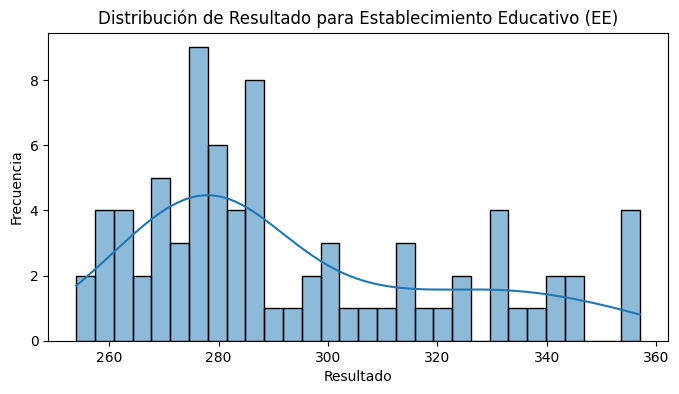

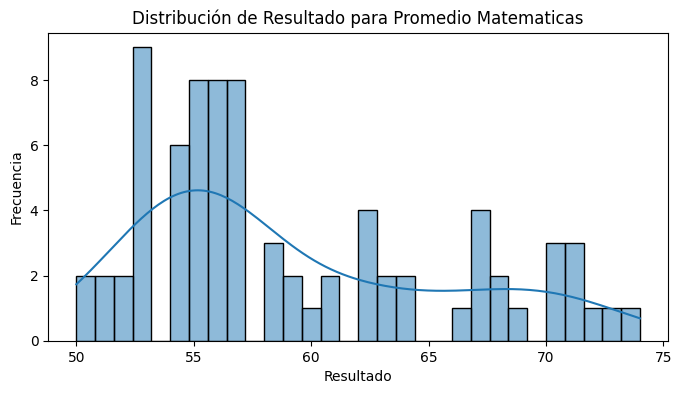

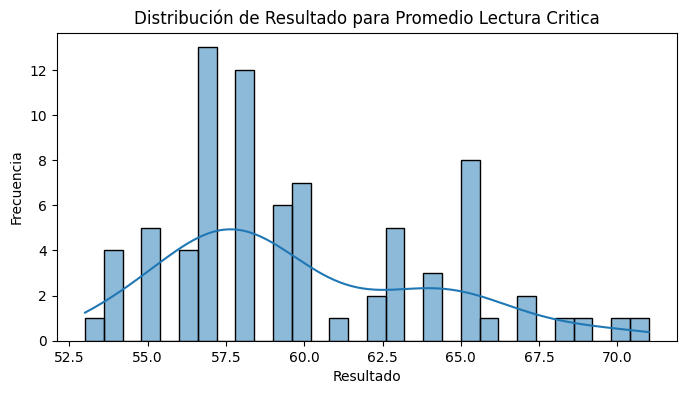

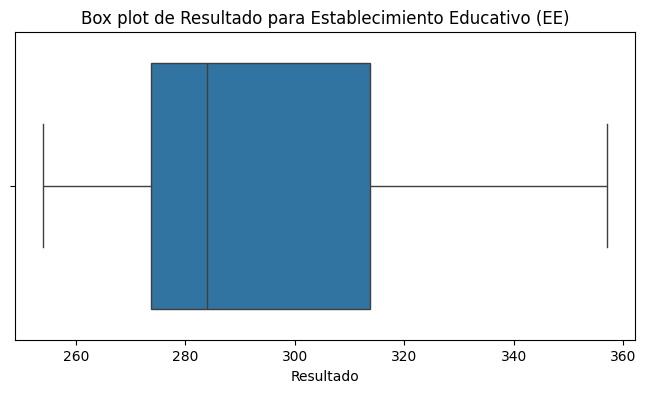

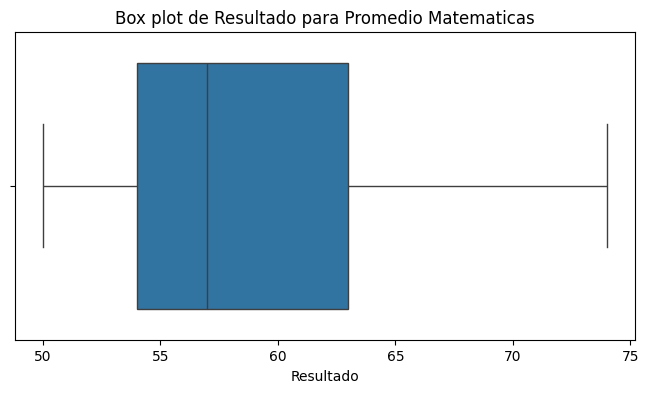

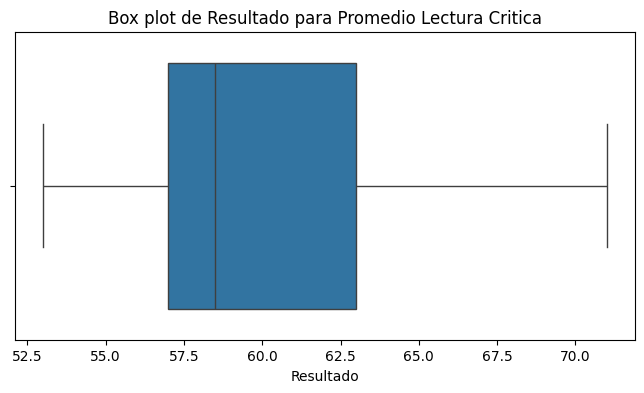

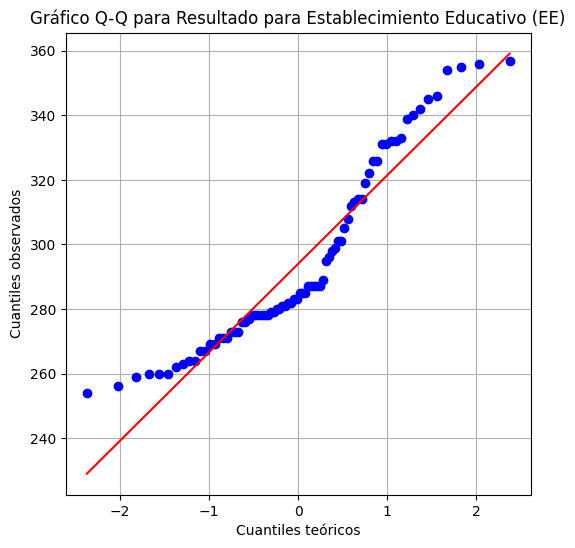

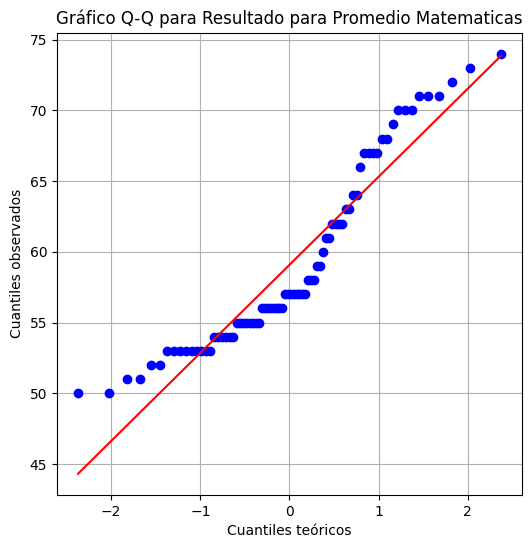

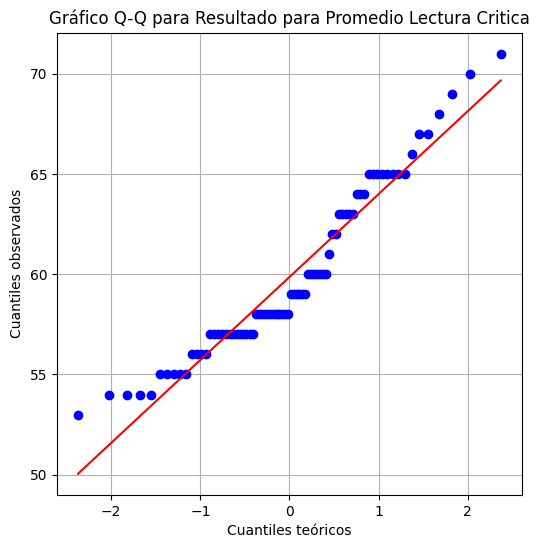


Indicadores restantes para graficar:
['Colombia', 'Entidad Territorial Certificada (ETC)', 'Oficiales Urbanos ETC', 'Oficiales Rurales ETC', 'Privados ETC']


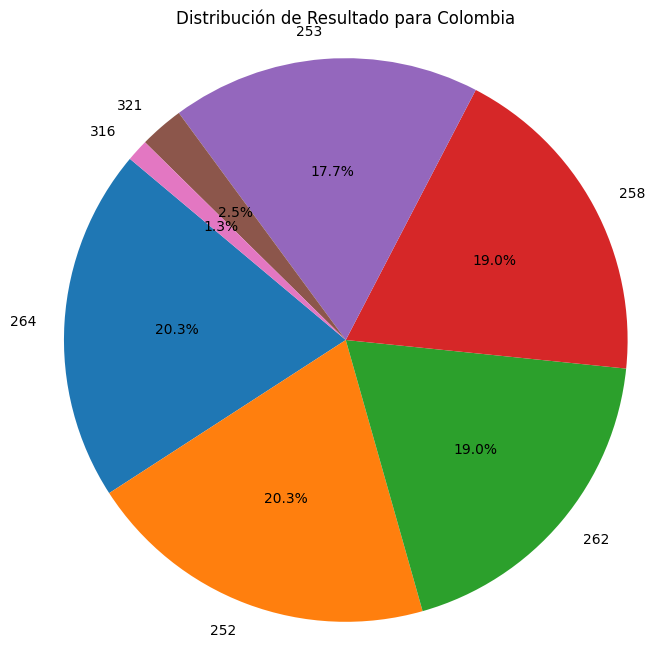

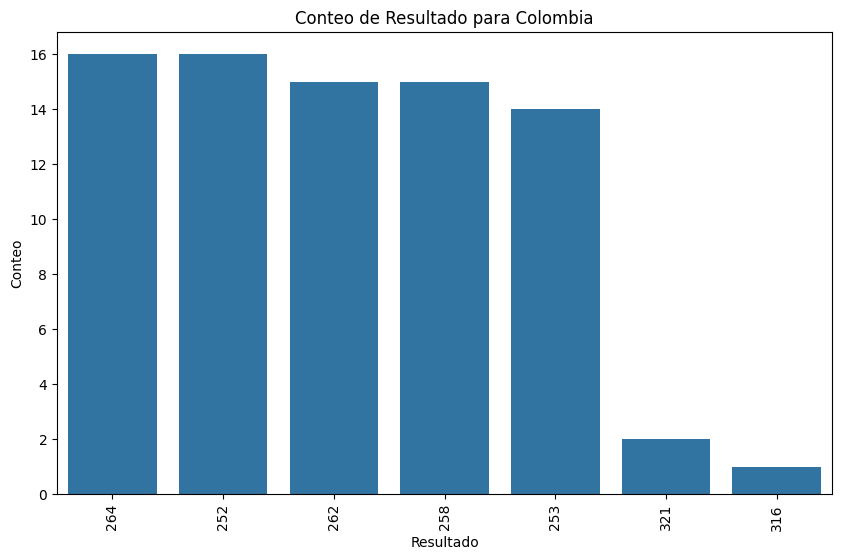

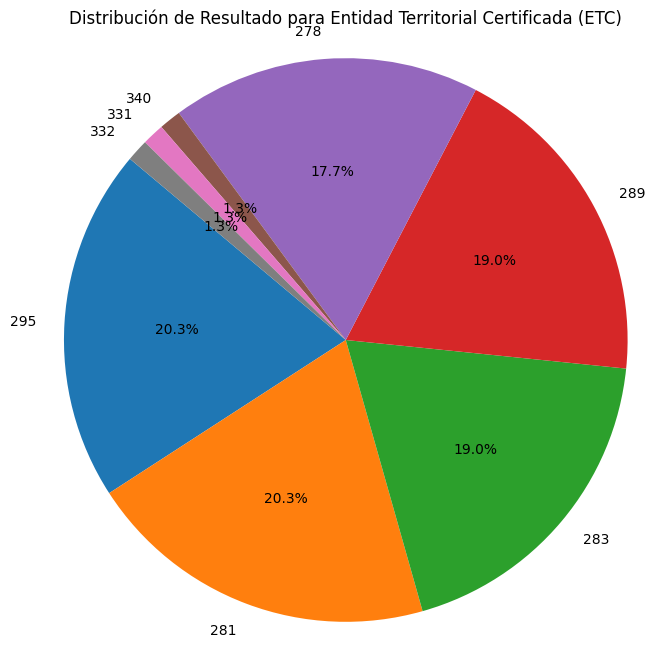

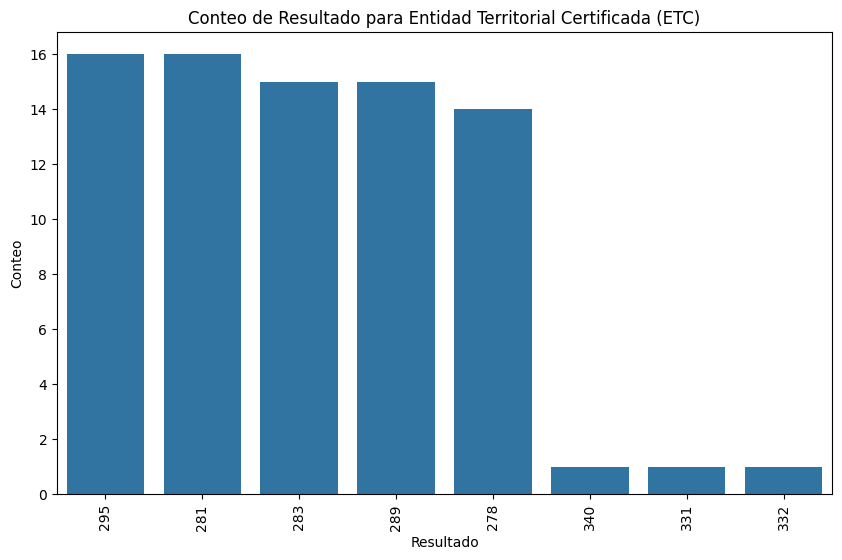

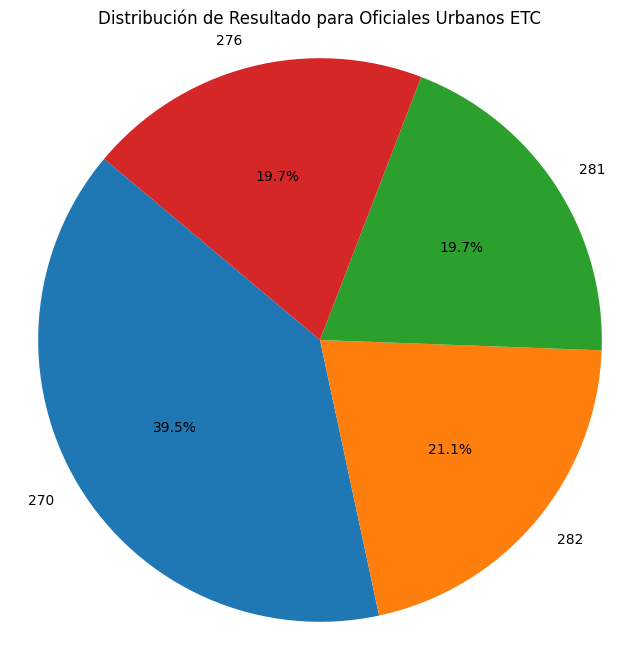

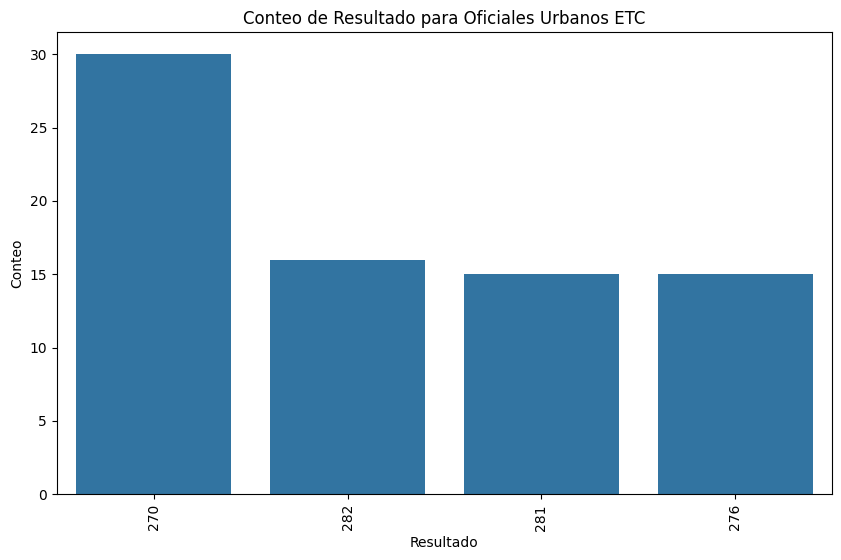

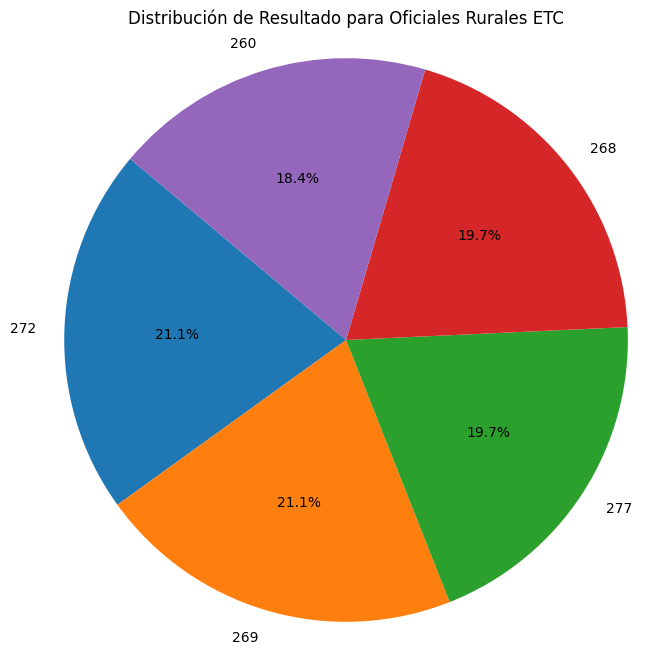

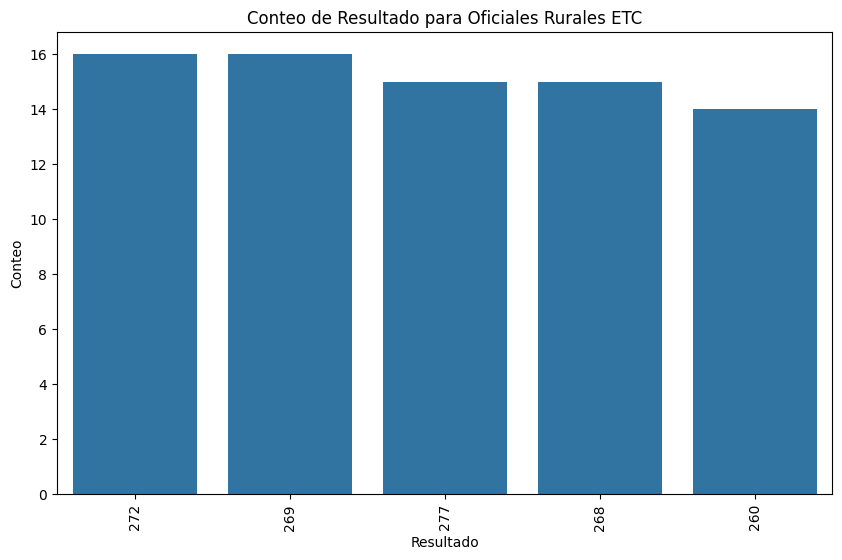

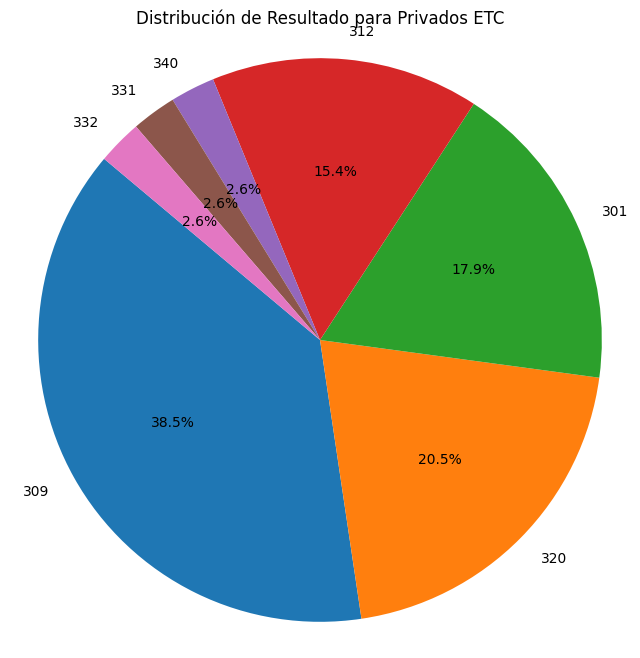

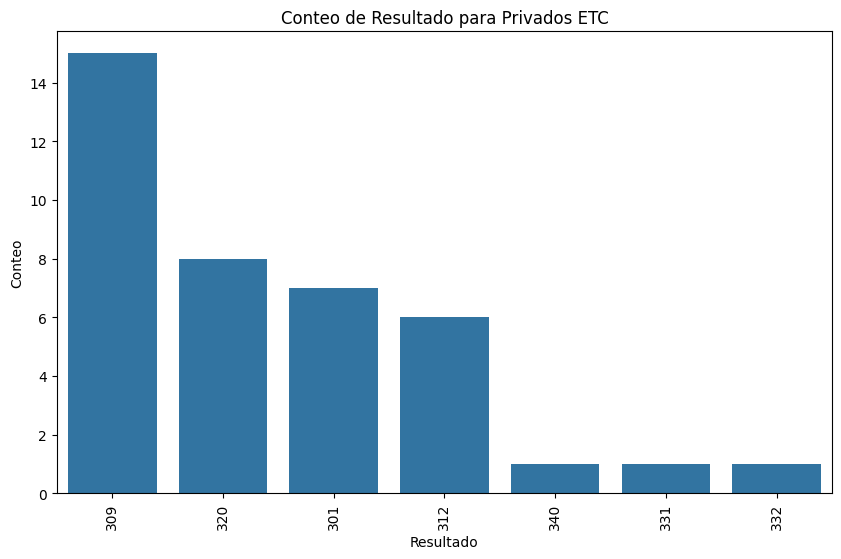

Indicador: Establecimiento Educativo (EE)
  Q1: 273.75
  Q3: 313.75
  IQR: 40.0
  Lower Bound: 213.75
  Upper Bound: 373.75
--------------------
Indicador: Promedio Matematicas
  Q1: 54.0
  Q3: 63.0
  IQR: 9.0
  Lower Bound: 40.5
  Upper Bound: 76.5
--------------------
Indicador: Promedio Lectura Critica
  Q1: 57.0
  Q3: 63.0
  IQR: 6.0
  Lower Bound: 48.0
  Upper Bound: 72.0
--------------------
DataFrame after removing outliers and combining with remaining data:
<class 'pandas.core.frame.DataFrame'>
Index: 583 entries, 0 to 580
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Año          583 non-null    int64 
 1   Sector       583 non-null    object
 2   Colegio      583 non-null    object
 3   Código DANE  583 non-null    int64 
 4   Indicador    583 non-null    object
 5   Resultado    583 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 31.9+ KB
None


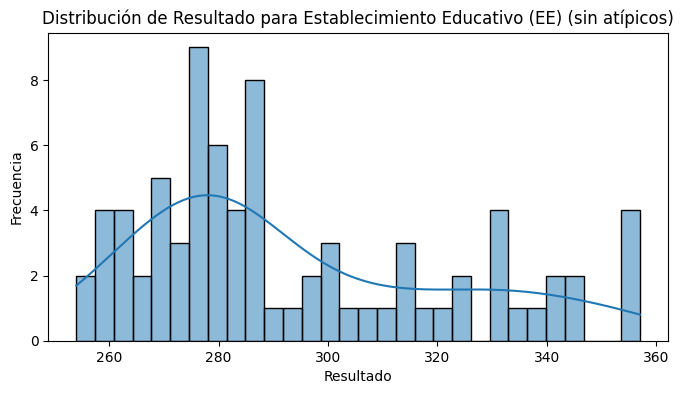

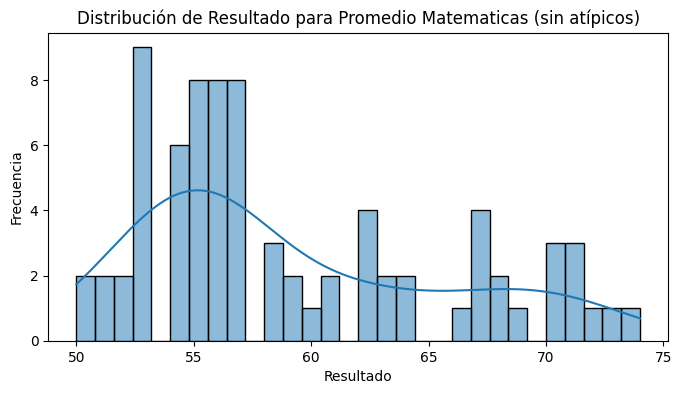

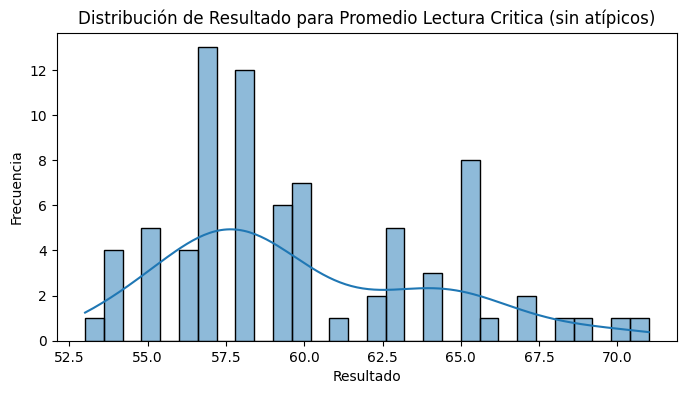

--- Tests de Normalidad para Establecimiento Educativo (EE) ---
Shapiro-Wilk Test: Statistic=0.9041, p-value=0.0000
Anderson-Darling Test: Statistic=2.8232
At a 15.0% significance level, the data does not look normal (critical value 0.5500)
At a 10.0% significance level, the data does not look normal (critical value 0.6260)
At a 5.0% significance level, the data does not look normal (critical value 0.7520)
At a 2.5% significance level, the data does not look normal (critical value 0.8770)
At a 1.0% significance level, the data does not look normal (critical value 1.0430)
Jarque-Bera Test: Statistic=8.5719, p-value=0.0138


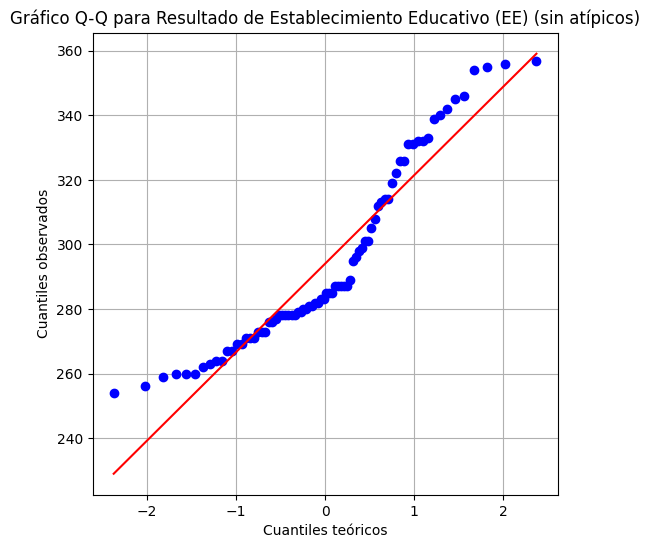

----------------------------------------
--- Tests de Normalidad para Promedio Matematicas ---
Shapiro-Wilk Test: Statistic=0.8976, p-value=0.0000
Anderson-Darling Test: Statistic=3.1279
At a 15.0% significance level, the data does not look normal (critical value 0.5500)
At a 10.0% significance level, the data does not look normal (critical value 0.6260)
At a 5.0% significance level, the data does not look normal (critical value 0.7520)
At a 2.5% significance level, the data does not look normal (critical value 0.8770)
At a 1.0% significance level, the data does not look normal (critical value 1.0430)
Jarque-Bera Test: Statistic=8.8269, p-value=0.0121


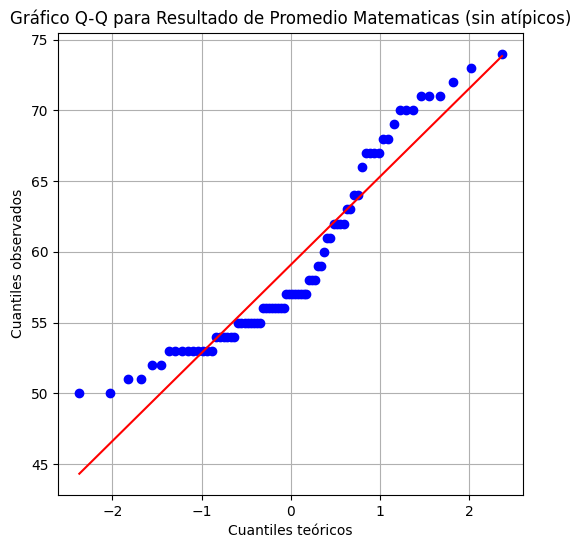

----------------------------------------
--- Tests de Normalidad para Promedio Lectura Critica ---
Shapiro-Wilk Test: Statistic=0.9335, p-value=0.0005
Anderson-Darling Test: Statistic=2.0515
At a 15.0% significance level, the data does not look normal (critical value 0.5500)
At a 10.0% significance level, the data does not look normal (critical value 0.6260)
At a 5.0% significance level, the data does not look normal (critical value 0.7520)
At a 2.5% significance level, the data does not look normal (critical value 0.8770)
At a 1.0% significance level, the data does not look normal (critical value 1.0430)
Jarque-Bera Test: Statistic=6.4255, p-value=0.0402


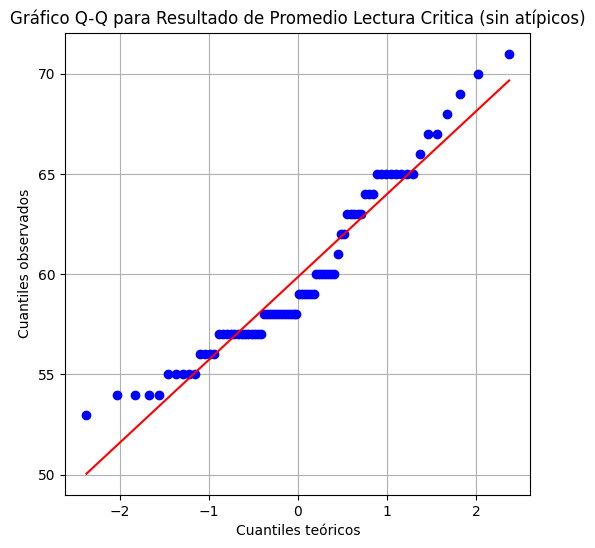

----------------------------------------


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Cargar el archivo CSV
df = pd.read_csv('/ResultadosSabanetaSaber11.csv')

# Mostrar información general
print('Información del dataset:')
print(df.info())

# Visualizar las primeras filas
print('\nPrimeras filas:')
print(df.head())

# Estadísticas descriptivas
print('\nEstadísticas descriptivas:')
print(df.describe())

print(df.isnull().sum())

# Rellenar valores nulos con la media de cada columna numérica
df.fillna(df.mean(numeric_only=True), inplace=True)

# Confirmar que no quedan nulos
print('\nValores nulos tras la imputación:')
print(df.isnull().sum())

columnas_puntajes = [
    'Resultado'
]

# Lista de indicadores a graficar
indicadores_filtrados = [
    'Establecimiento Educativo (EE)',
    'Promedio Matematicas',
    'Promedio Lectura Critica'
]


# Histograma
for indicador in indicadores_filtrados:
    df_indicador = df[df['Indicador'] == indicador]
    plt.figure(figsize=(8, 4))
    sns.histplot(df_indicador['Resultado'], kde=True, bins=30)
    plt.title(f'Distribución de Resultado para {indicador}')
    plt.xlabel('Resultado')
    plt.ylabel('Frecuencia')
    plt.show()

# Box plot
for indicador in indicadores_filtrados:
    df_indicador = df[df['Indicador'] == indicador]
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_indicador['Resultado'])
    plt.title(f'Box plot de Resultado para {indicador}')
    plt.xlabel('Resultado')
    plt.show()


def graficar_qq(datos, nombre):
    plt.figure(figsize=(6, 6))
    stats.probplot(datos, dist="norm", plot=plt)
    plt.title(f"Gráfico Q-Q para {nombre}")
    plt.xlabel("Cuantiles teóricos")
    plt.ylabel("Cuantiles observados")
    plt.grid(True)
    plt.show()

# QQ plot
for indicador in indicadores_filtrados:
    df_indicador = df[df['Indicador'] == indicador]
    graficar_qq(df_indicador['Resultado'].dropna(), f"Resultado para {indicador}")


# Identificar los indicadores restantes
indicadores_restantes = df['Indicador'].unique().tolist()
for indicador in indicadores_filtrados:
    if indicador in indicadores_restantes:
        indicadores_restantes.remove(indicador)

print("\nIndicadores restantes para graficar:")
print(indicadores_restantes)

# Generar diagramas de torta y barras para los indicadores restantes
for indicador in indicadores_restantes:
    df_indicador = df[df['Indicador'] == indicador]
    resultado_counts = df_indicador['Resultado'].value_counts()

    # Diagrama de torta
    plt.figure(figsize=(8, 8))
    plt.pie(resultado_counts, labels=resultado_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribución de Resultado para {indicador}')
    plt.axis('equal')
    plt.show()

    # Diagrama de barras
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_indicador, x='Resultado', order=resultado_counts.index)
    plt.title(f'Conteo de Resultado para {indicador}')
    plt.xlabel('Resultado')
    plt.ylabel('Conteo')
    plt.xticks(rotation=90)
    plt.show()

    indicadores_filtrados = [
    'Establecimiento Educativo (EE)',
    'Promedio Matematicas',
    'Promedio Lectura Critica'
]

outlier_bounds = {}

for indicador in indicadores_filtrados:
    df_indicador = df[df['Indicador'] == indicador]['Resultado'].dropna()
    Q1 = df_indicador.quantile(0.25)
    Q3 = df_indicador.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_bounds[indicador] = (lower_bound, upper_bound)

    print(f"Indicador: {indicador}")
    print(f"  Q1: {Q1}")
    print(f"  Q3: {Q3}")
    print(f"  IQR: {IQR}")
    print(f"  Lower Bound: {lower_bound}")
    print(f"  Upper Bound: {upper_bound}")
    print("-" * 20)

    df_filtered = pd.DataFrame()

for indicador in indicadores_filtrados:
    lower_bound, upper_bound = outlier_bounds[indicador]
    df_indicador_filtered = df[(df['Indicador'] == indicador) &
                               (df['Resultado'] >= lower_bound) &
                               (df['Resultado'] <= upper_bound)].copy()
    df_filtered = pd.concat([df_filtered, df_indicador_filtered])

df_remaining = df[~df['Indicador'].isin(indicadores_filtrados)].copy()

df = pd.concat([df_filtered, df_remaining])

print("DataFrame after removing outliers and combining with remaining data:")
print(df.info())

for indicador in indicadores_filtrados:
    df_indicador = df[df['Indicador'] == indicador]
    plt.figure(figsize=(8, 4))
    sns.histplot(df_indicador['Resultado'], kde=True, bins=30)
    plt.title(f'Distribución de Resultado para {indicador} (sin atípicos)')
    plt.xlabel('Resultado')
    plt.ylabel('Frecuencia')
    plt.show()


from scipy import stats

indicadores_filtrados = [
    'Establecimiento Educativo (EE)',
    'Promedio Matematicas',
    'Promedio Lectura Critica'
]

for indicador in indicadores_filtrados:
    df_indicador = df[df['Indicador'] == indicador]['Resultado'].dropna()

    print(f"--- Tests de Normalidad para {indicador} ---")

    # Shapiro-Wilk test
    shapiro_test = stats.shapiro(df_indicador)
    print(f"Shapiro-Wilk Test: Statistic={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")

    # Anderson-Darling test
    anderson_test = stats.anderson(df_indicador, dist='norm')
    print(f"Anderson-Darling Test: Statistic={anderson_test.statistic:.4f}")
    for i in range(len(anderson_test.critical_values)):
        sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
        if anderson_test.statistic < cv:
            print(f'At a {sl}% significance level, the data looks normal (critical value {cv:.4f})')
        else:
            print(f'At a {sl}% significance level, the data does not look normal (critical value {cv:.4f})')

    # Jarque-Bera test
    try:
        jarque_bera_test = stats.jarque_bera(df_indicador)
        print(f"Jarque-Bera Test: Statistic={jarque_bera_test.statistic:.4f}, p-value={jarque_bera_test.pvalue:.4f}")
    except ValueError as e:
        print(f"Jarque-Bera Test could not be performed: {e}")


    # QQ plot
    plt.figure(figsize=(6, 6))
    stats.probplot(df_indicador, dist="norm", plot=plt)
    plt.title(f"Gráfico Q-Q para Resultado de {indicador} (sin atípicos)")
    plt.xlabel("Cuantiles teóricos")
    plt.ylabel("Cuantiles observados")
    plt.grid(True)
    plt.show()

    print("-" * 40)

# Task
Analiza el archivo "resultados_saber_11.csv" para las columnas "Resultado para Establecimiento Educativo (EE)", "Resultado para Promedio Matematicas" y "Resultado para Promedio Lectura Critica". Para estas columnas, identifica y elimina los datos atípicos utilizando el rango intercuartílico y genera un histograma sin dichos datos. Para las otras variables, genera diagramas de torta y barras.

## Calculate iqr and identify outliers

### Subtask:
For each of the specified indicators, calculate the first quartile (Q1), the third quartile (Q3), and the Interquartile Range (IQR). Define the lower and upper bounds for outlier detection.


**Reasoning**:
Calculate and store the outlier bounds for the specified indicators.



In [8]:
indicadores_filtrados = [
    'Establecimiento Educativo (EE)',
    'Promedio Matematicas',
    'Promedio Lectura Critica'
]

outlier_bounds = {}

for indicador in indicadores_filtrados:
    df_indicador = df[df['Indicador'] == indicador]['Resultado'].dropna()
    Q1 = df_indicador.quantile(0.25)
    Q3 = df_indicador.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_bounds[indicador] = (lower_bound, upper_bound)

    print(f"Indicador: {indicador}")
    print(f"  Q1: {Q1}")
    print(f"  Q3: {Q3}")
    print(f"  IQR: {IQR}")
    print(f"  Lower Bound: {lower_bound}")
    print(f"  Upper Bound: {upper_bound}")
    print("-" * 20)

Indicador: Establecimiento Educativo (EE)
  Q1: 273.75
  Q3: 313.75
  IQR: 40.0
  Lower Bound: 213.75
  Upper Bound: 373.75
--------------------
Indicador: Promedio Matematicas
  Q1: 54.0
  Q3: 63.0
  IQR: 9.0
  Lower Bound: 40.5
  Upper Bound: 76.5
--------------------
Indicador: Promedio Lectura Critica
  Q1: 57.0
  Q3: 63.0
  IQR: 6.0
  Lower Bound: 48.0
  Upper Bound: 72.0
--------------------


## Remove outliers

### Subtask:
Filter the DataFrame to remove the rows where the 'Resultado' for the specified indicators falls outside the calculated bounds.


**Reasoning**:
Filter the DataFrame to remove outliers for the specified indicators and concatenate with the remaining data.



In [9]:
df_filtered = pd.DataFrame()

for indicador in indicadores_filtrados:
    lower_bound, upper_bound = outlier_bounds[indicador]
    df_indicador_filtered = df[(df['Indicador'] == indicador) &
                               (df['Resultado'] >= lower_bound) &
                               (df['Resultado'] <= upper_bound)].copy()
    df_filtered = pd.concat([df_filtered, df_indicador_filtered])

df_remaining = df[~df['Indicador'].isin(indicadores_filtrados)].copy()

df = pd.concat([df_filtered, df_remaining])

print("DataFrame after removing outliers and combining with remaining data:")
print(df.info())

DataFrame after removing outliers and combining with remaining data:
<class 'pandas.core.frame.DataFrame'>
Index: 583 entries, 0 to 580
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Año          583 non-null    int64 
 1   Sector       583 non-null    object
 2   Colegio      583 non-null    object
 3   Código DANE  583 non-null    int64 
 4   Indicador    583 non-null    object
 5   Resultado    583 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 31.9+ KB
None


## Generate histograms

### Subtask:
Create histograms for the 'Resultado' of the filtered data for each of the specified indicators to visualize the distribution without outliers.


**Reasoning**:
Create histograms for the filtered data of the specified indicators to visualize the distribution without outliers.



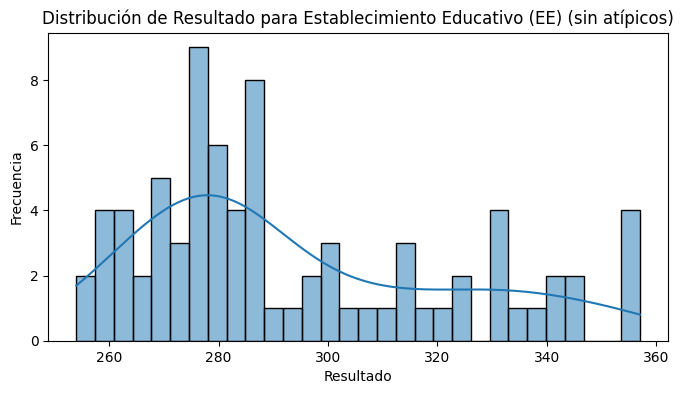

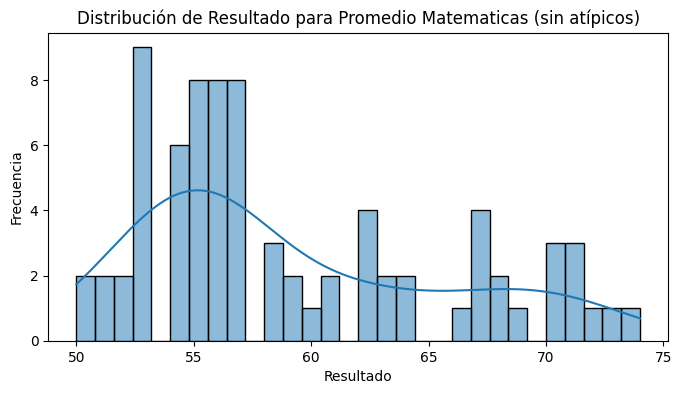

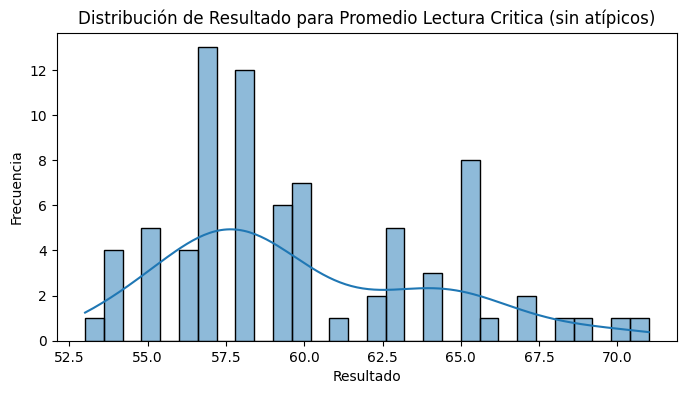

In [10]:
for indicador in indicadores_filtrados:
    df_indicador = df[df['Indicador'] == indicador]
    plt.figure(figsize=(8, 4))
    sns.histplot(df_indicador['Resultado'], kde=True, bins=30)
    plt.title(f'Distribución de Resultado para {indicador} (sin atípicos)')
    plt.xlabel('Resultado')
    plt.ylabel('Frecuencia')
    plt.show()

## Summary:

### Data Analysis Key Findings

*   The first quartile (Q1), third quartile (Q3), and Interquartile Range (IQR) were calculated for 'Establecimiento Educativo (EE)', 'Promedio Matematicas', and 'Promedio Lectura Critica'.
*   Outlier bounds using the 1.5\*IQR rule were determined for these indicators.
*   Rows with 'Resultado' values outside these calculated bounds were successfully removed for the specified indicators.
*   The filtered data for the specified indicators was combined with the data for all other indicators, resulting in a DataFrame with 583 entries after outlier removal.
*   Histograms showing the distribution of 'Resultado' for 'Establecimiento Educativo (EE)', 'Promedio Matematicas', and 'Promedio Lectura Critica' were generated using the data without outliers.

### Insights or Next Steps

*   The outlier removal process significantly impacts the distribution shapes observed in the histograms, providing a clearer view of the central tendency and spread of the non-outlier data.
*   Further analysis could involve comparing the descriptive statistics (mean, median, standard deviation) before and after outlier removal to quantify their impact.


## Perform Normality Tests and Generate Q-Q Plots

### Subtask:
Perform Shapiro-Wilk, Anderson-Darling, and Jarque-Bera normality tests and generate Q-Q plots for the 'Resultado' of the filtered data for each of the specified indicators.

**Reasoning**:
Perform the requested normality tests and generate Q-Q plots for the specified indicators using the filtered data.

--- Tests de Normalidad para Establecimiento Educativo (EE) ---
Shapiro-Wilk Test: Statistic=0.9041, p-value=0.0000
Anderson-Darling Test: Statistic=2.8232
At a 15.0% significance level, the data does not look normal (critical value 0.5500)
At a 10.0% significance level, the data does not look normal (critical value 0.6260)
At a 5.0% significance level, the data does not look normal (critical value 0.7520)
At a 2.5% significance level, the data does not look normal (critical value 0.8770)
At a 1.0% significance level, the data does not look normal (critical value 1.0430)
Jarque-Bera Test: Statistic=8.5719, p-value=0.0138


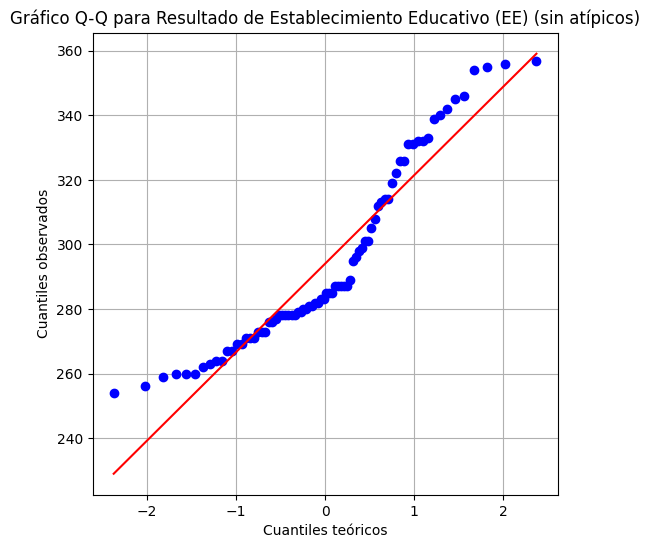

----------------------------------------
--- Tests de Normalidad para Promedio Matematicas ---
Shapiro-Wilk Test: Statistic=0.8976, p-value=0.0000
Anderson-Darling Test: Statistic=3.1279
At a 15.0% significance level, the data does not look normal (critical value 0.5500)
At a 10.0% significance level, the data does not look normal (critical value 0.6260)
At a 5.0% significance level, the data does not look normal (critical value 0.7520)
At a 2.5% significance level, the data does not look normal (critical value 0.8770)
At a 1.0% significance level, the data does not look normal (critical value 1.0430)
Jarque-Bera Test: Statistic=8.8269, p-value=0.0121


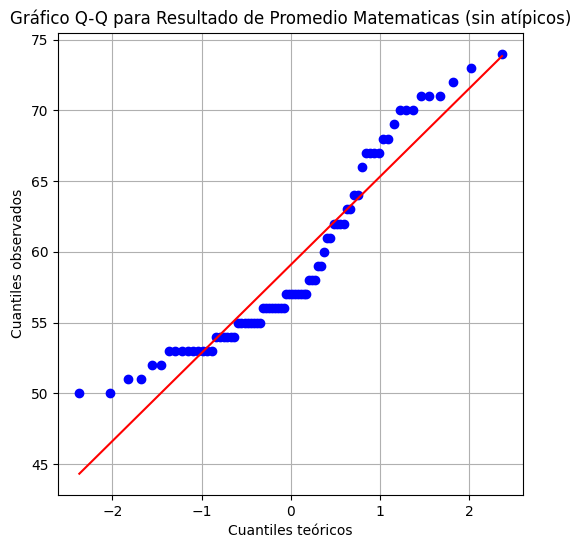

----------------------------------------
--- Tests de Normalidad para Promedio Lectura Critica ---
Shapiro-Wilk Test: Statistic=0.9335, p-value=0.0005
Anderson-Darling Test: Statistic=2.0515
At a 15.0% significance level, the data does not look normal (critical value 0.5500)
At a 10.0% significance level, the data does not look normal (critical value 0.6260)
At a 5.0% significance level, the data does not look normal (critical value 0.7520)
At a 2.5% significance level, the data does not look normal (critical value 0.8770)
At a 1.0% significance level, the data does not look normal (critical value 1.0430)
Jarque-Bera Test: Statistic=6.4255, p-value=0.0402


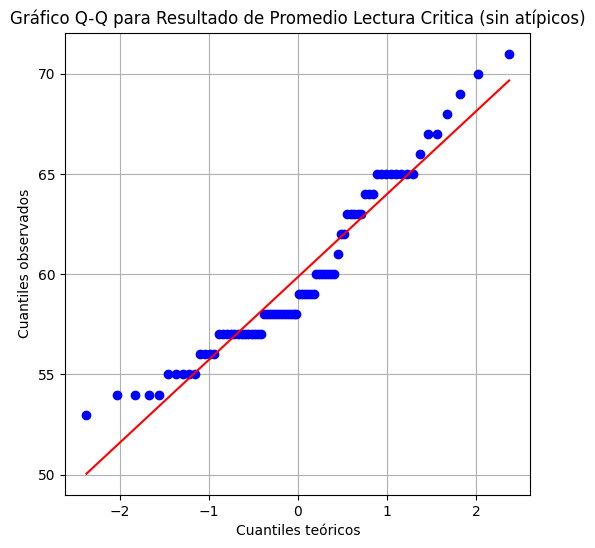

----------------------------------------


In [12]:
from scipy import stats

indicadores_filtrados = [
    'Establecimiento Educativo (EE)',
    'Promedio Matematicas',
    'Promedio Lectura Critica'
]

for indicador in indicadores_filtrados:
    df_indicador = df[df['Indicador'] == indicador]['Resultado'].dropna()

    print(f"--- Tests de Normalidad para {indicador} ---")

    # Shapiro-Wilk test
    shapiro_test = stats.shapiro(df_indicador)
    print(f"Shapiro-Wilk Test: Statistic={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")

    # Anderson-Darling test
    anderson_test = stats.anderson(df_indicador, dist='norm')
    print(f"Anderson-Darling Test: Statistic={anderson_test.statistic:.4f}")
    for i in range(len(anderson_test.critical_values)):
        sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
        if anderson_test.statistic < cv:
            print(f'At a {sl}% significance level, the data looks normal (critical value {cv:.4f})')
        else:
            print(f'At a {sl}% significance level, the data does not look normal (critical value {cv:.4f})')

    # Jarque-Bera test
    try:
        jarque_bera_test = stats.jarque_bera(df_indicador)
        print(f"Jarque-Bera Test: Statistic={jarque_bera_test.statistic:.4f}, p-value={jarque_bera_test.pvalue:.4f}")
    except ValueError as e:
        print(f"Jarque-Bera Test could not be performed: {e}")


    # QQ plot
    plt.figure(figsize=(6, 6))
    stats.probplot(df_indicador, dist="norm", plot=plt)
    plt.title(f"Gráfico Q-Q para Resultado de {indicador} (sin atípicos)")
    plt.xlabel("Cuantiles teóricos")
    plt.ylabel("Cuantiles observados")
    plt.grid(True)
    plt.show()

    print("-" * 40)